In [1]:
import seaborn as sns
if sns.__version__ == '0.8.1':
    !sudo pip install --upgrade seaborn

In [2]:
import os
import pandas as pd
import numpy as np
import yaml
import pickle
import sys
sys.path.append('../code/')

from nn_models import *
from kinematics_decoding import load_model

from tensorflow.python import pywrap_tensorflow

%matplotlib inline
import matplotlib.pyplot as plt


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



**Load trained models.**

In [3]:
all_models = pickle.load(open('./convmodels.p', 'rb'))

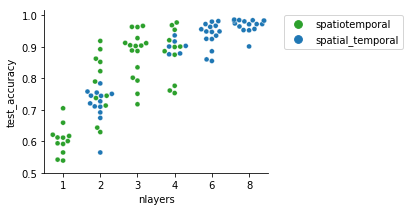

In [6]:
models_2 = all_models.copy()
models_2.loc[(models_2['arch_type']!='spatiotemporal'), 'nlayers'] *= 2

plt.figure(figsize=[4, 3])
sns.swarmplot(x='nlayers', y='test_accuracy', 
                data=models_2[models_2['arch_type'] != 'temporal_spatial'], hue='arch_type',
                palette=['C2', 'C0'], edgecolor='white', linewidth=0.3)
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

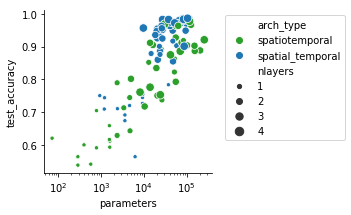

In [8]:
plt.figure(figsize=[3, 3])
sns.scatterplot(x='parameters', y='test_accuracy', data=all_models[all_models['arch_type']!='temporal_spatial'],
                hue='arch_type', size='nlayers', palette=['C2', 'C0'])
plt.xscale('log')
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

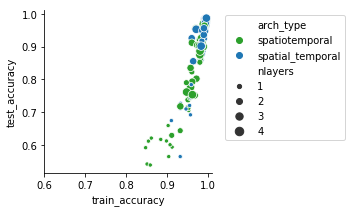

In [10]:
plt.figure(figsize=[3, 3])

sns.scatterplot(x='train_accuracy', y='test_accuracy', 
                data=all_models[all_models['arch_type'] != 'temporal_spatial'], hue='arch_type',
                size='nlayers', palette=['C2', 'C0'])
sns.despine()
plt.xlim([0.6, 1.01])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

In [ ]:
plt.figure(figsize=[0.85, 2])

arch_types = ['spatiotemporal', 'spatial_temporal']
for atype in arch_types:
    sns.distplot(all_models[all_models['arch_type'] == atype]['test_accuracy'], 
        hist=False, rug=True, vertical=True)

plt.ylim((0.5, 1.02))
plt.xticks(fontsize=7)
plt.ylabel(''); plt.yticks([], [])
sns.despine(trim=True, left=True)

**Effect of other architectural parameters on the performance.**

In [ ]:
plt.figure(figsize=[10, 4])

plt.subplot(1, 4, 1)
sns.boxplot(y='test_accuracy', x='s_kernelsize', data=all_models, hue='arch_type', width=0.8)
sns.despine(trim=True, ax=plt.gca()); plt.gca().get_legend().remove()

plt.subplot(1, 4, 2)
sns.boxplot(y='test_accuracy', x='t_kernelsize', data=all_models, hue='arch_type', width=0.8)
sns.despine(trim=True, left=True, ax=plt.gca()); plt.yticks([]); plt.ylabel('')
plt.gca().get_legend().remove()

plt.subplot(1, 4, 3)
sns.boxplot(y='test_accuracy', x='s_stride', data=all_models, hue='arch_type', width=0.4)
sns.despine(trim=True, left=True, ax=plt.gca()); plt.yticks([]); plt.ylabel('')
plt.gca().get_legend().remove()

plt.subplot(1, 4, 4)
sns.boxplot(y='test_accuracy', x='t_stride', data=all_models, hue='arch_type', width=0.6)
sns.despine(trim=True, left=True, ax=plt.gca()); plt.yticks([]); plt.ylabel('')